In [1]:
pip install tensorflow keras numpy matplotlib scikit-learn


In [5]:
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths
zip_path = "/content/Harvard Medical Dataset2.zip"  # Path to ZIP file
extracted_path = "/content/Harvard_Medical_Dataset2"  # Extraction path

# Extract the ZIP file
if not os.path.exists(extracted_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)

# Load and preprocess data
def load_data(data_dir):
    images, labels = [], []
    tumor_types = sorted(os.listdir(data_dir))  # Ensure consistent label ordering
    for label, tumor_type in enumerate(tumor_types):
        tumor_dir = os.path.join(data_dir, tumor_type)
        if os.path.isdir(tumor_dir):  # Ensure it is a directory
            for image_name in os.listdir(tumor_dir):
                image_path = os.path.join(tumor_dir, image_name)
                try:
                    image = plt.imread(image_path)  # Read the image
                    if len(image.shape) == 2:  # Convert grayscale to RGB if needed
                        image = np.stack((image,)*3, axis=-1)
                    images.append(image)
                    labels.append(label)
                except Exception as e:
                    print(f"Error reading {image_path}: {e}")
    return np.array(images), np.array(labels)

# Define data directory
data_dir = extracted_path + '/Harvard Medical Dataset2'

# Load dataset
X, y = load_data(data_dir)

# Normalize data
X = X / 255.0

# Encode labels
y = to_categorical(y)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check dataset shapes
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Validation labels shape: {y_val.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: (106, 256, 256, 3), Training labels shape: (106, 2)
Validation data shape: (23, 256, 256, 3), Validation labels shape: (23, 2)
Test data shape: (23, 256, 256, 3), Test labels shape: (23, 2)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Build the CNN model
def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Compile the model
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]
model = build_cnn_model(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 0.6233 - loss: 43.8799 - val_accuracy: 0.8261 - val_loss: 0.4622
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 0.9025 - loss: 1.3986 - val_accuracy: 0.6957 - val_loss: 0.5346
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 7s/step - accuracy: 0.7517 - loss: 1.7467 - val_accuracy: 0.6522 - val_loss: 0.5521
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.8943 - loss: 1.3595 - val_accuracy: 0.8696 - val_loss: 0.6982
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.9293 - loss: 0.1655 - val_accuracy: 0.6522 - val_loss: 1.2048
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.9188 - loss: 0.2064 - val_accuracy: 0.5652 - val_loss: 2.4100
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.9413 - loss: 0.2084 - val_accuracy: 0.5217 - val_loss: 4.8850
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 7s/step - accuracy: 0.9423 - loss: 0.1614 - val_accuracy: 0.5217 - val_loss: 8.0614
Epoch 9

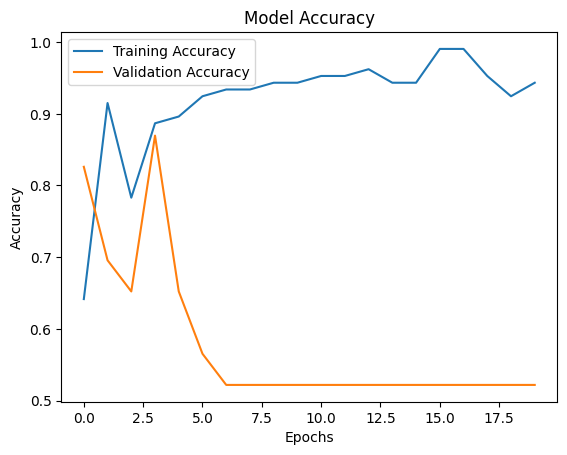

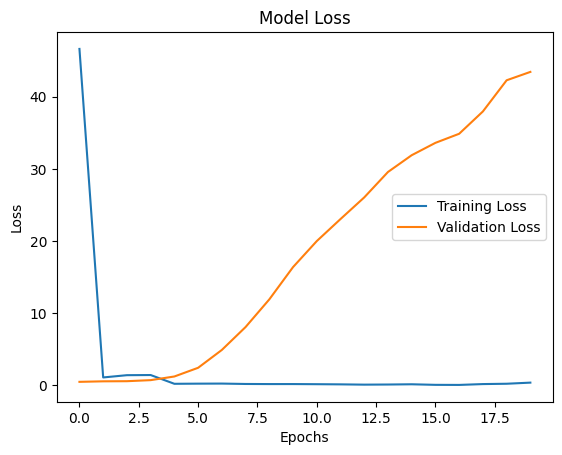

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
model.save('brain_tumor_detection_model.h5')
print("Model saved as 'brain_tumor_detection_model.h5'")


Model saved as 'brain_tumor_detection_model.h5'


In [12]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Path to the ZIP file and extraction directory
zip_path = "/content/archive.zip"
extracted_path = "/content/archive_extracted"

# Extract the ZIP file if not already extracted
if not os.path.exists(extracted_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)

# Define the Testing directory
testing_dir = os.path.join(extracted_path, 'Testing')

# Function to test the dataset
def test_on_dataset(model, base_dir, input_shape):
    results = []
    if not os.path.exists(base_dir):
        print(f"Error: Directory {base_dir} not found.")
        return results

    tumor_types = sorted(os.listdir(base_dir))  # Ensure consistent ordering
    for label, tumor_type in enumerate(tumor_types):
        tumor_dir = os.path.join(base_dir, tumor_type)
        if os.path.isdir(tumor_dir):  # Ensure it is a directory
            print(f"Processing: {tumor_type}")
            for image_name in os.listdir(tumor_dir):
                image_path = os.path.join(tumor_dir, image_name)
                try:
                    # Load and preprocess the image
                    image = load_img(image_path, target_size=input_shape[:2])
                    image_array = img_to_array(image) / 255.0  # Normalize
                    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

                    # Predict
                    prediction = model.predict(image_array)
                    predicted_label = np.argmax(prediction, axis=1)[0]
                    confidence = prediction[0][predicted_label]

                    results.append({
                        "image": image_name,
                        "true_label": label,
                        "predicted_label": predicted_label,
                        "confidence": confidence
                    })
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")
    return results

# Example usage:

try:
    test_results = test_on_dataset(model, testing_dir, input_shape)

    # Print the results
    for result in test_results[:10]:  # Show the first 10 results
        print(result)
except Exception as e:
    print(f"Error during testing: {e}")


Processing: glioma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Build the model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile and train the transfer learning model
transfer_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
transfer_history = transfer_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the transfer learning model
test_loss, test_accuracy = transfer_model.evaluate(X_test, y_test, verbose=2)
print(f"Transfer Learning Test Accuracy: {test_accuracy:.2f}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 129s 34s/step - accuracy: 0.5566 - loss: 0.7987 - val_accuracy: 0.5217 - val_loss: 0.6553
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 124s 28s/step - accuracy: 0.5892 - loss: 0.7701 - val_accuracy: 0.7391 - val_loss: 0.6044
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 136s 26s/step - accuracy: 0.5739 - loss: 0.7121 - val_accuracy: 0.6087 - val_loss: 0.5986
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 103s 26s/step - accuracy: 0.6375 - loss: 0.6337 - val_accuracy: 1.0000 - val_loss: 0.5423
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 142s 26s/step - accuracy: 0.6898 - loss: 0.5997 - val_accuracy: 0.7826 - val_loss: 0.5307
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 142s 26s/step - accuracy: 0.6358 - loss: 0.6049 - val_accuracy: 1.0000 - val_loss: 0.4887
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 142s 26s/step - accuracy: 0.6640 - loss: 0.5941 - val_accuracy: 0.7391 - val_loss: 0.4991
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 143s 26s/step - accuracy: 0.742